In [1]:
import numpy as np
import pandas as pd
import bioframe as bf
import cooltools
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

<h3> CTCF occupancy per IPG in HCT116 and H1-hESCs

In [157]:
conditions = ['H1', 'HCT']

CTCF_paths = {
    'H1': 'H1_CTCF_r1_ENCFF692RPA.bed.gz', 
    'HCT': 'HCT116_CTCF_r1r2_ENCFF463FGL.bed.gz', 
}

In [159]:
ctcf = {
    cond: pd.read_table(
        path, 
        sep='\t', 
        header=None,
        names=['chrom', 'start', 'end', 'name', 'score', 'strand', 'signalValue', 'pValue', 'qValue', 'peak']
    ) for cond, path in CTCF_paths.items()
}

ctcf['HCT'].head()



,chrom,start,end,name,score,strand,signalValue,pValue,qValue,peak
0,chr17,36148893,36149387,.,1000,.,653.62460,-1.0,5.11483,254
1,chr10,100433702,100434245,.,1000,.,591.45045,-1.0,5.11483,263
2,chr16,86563726,86564257,.,1000,.,590.14796,-1.0,5.11483,252
3,chr17,80575271,80575754,.,1000,.,589.18857,-1.0,5.11483,249
4,chr17,50200429,50201075,.,1000,.,582.07648,-1.0,5.11483,325


In [160]:
#Load IPGs
hct_path = '/net/levsha/share/nezar/heterochrom2019/eigs_norm3/clusters_final'
hct116_cluster = pd.read_table(f'{hct_path}/HCT116_Unsynchronized.hg38.50000.clusters.E1-E9.eignorm_sqrt.chr1-22.kmeans8_5.compressed.tsv', 
                          sep='\t',)
hct116_cluster['name'] = hct116_cluster['name'].apply(
    {'A1': 'A1', 
     'A0': 'A2', 
     'B0': 'B0', 
     'B1': 'B1', 
     'B2': 'B4'}.get
)
hct116_cluster['length'] = hct116_cluster['end'] - hct116_cluster['start']
hct116_cluster[100:105]

,chrom,start,end,name,color,length
100,chr1,75750000,75800000,A2,#f78200,50000
101,chr1,75800000,76700000,B0,#5ebd3e,900000
102,chr1,76700000,76800000,B1,#009cdf,100000
103,chr1,76800000,77650000,B0,#5ebd3e,850000
104,chr1,77650000,77700000,A2,#f78200,50000


In [161]:
#List of all known CTCF peaks in various cell types
ctcf_maurano = pd.read_table('/net/levsha/share/spracklin/HCT116_hic/bedfiles/CTCF_hg38_liftover_maurano_masterlist.bed',
                           header=0,
                           sep='\t',
                           names=['chrom','start','end','name','score','strand'])
ctcf_maurano

,chrom,start,end,name,score,strand
0,chr1,267933,268083,id-2,0,+
1,chr1,586087,586237,id-3,0,+
2,chr1,778825,778975,id-4,0,+
3,chr1,850485,850635,id-5,0,-
4,chr1,858078,858228,id-6,0,+
...,...,...,...,...,...,...
109282,chrY,56838961,56839111,id-109338,0,+
109283,chrY,56839441,56839591,id-109339,0,+
109284,chrY,56842347,56842497,id-109340,0,+
109285,chrY,56843607,56843757,id-109341,0,+


In [163]:
# overlap CTCF bedfile with IPGs
ov = bf.count_overlaps(hct116_cluster, ctcf['H1'], suffixes=('','_')).rename(columns={
    'count': 'count_H1'
})
ov = bf.count_overlaps(ov, ctcf['HCT'], suffixes=('','_')).rename(columns={
    'count': 'count_HCT'
})
ov = bf.count_overlaps(ov, ctcf_maurano, suffixes=('','_')).rename(columns={
    'count': 'count_maurano'
})

ov

,chrom,start,end,name,color,length,count_H1,count_HCT,count_maurano
0,chr1,850000,1700000,A1,#e23838,850000,59,55,99
1,chr1,1750000,2450000,A2,#f78200,700000,41,32,93
2,chr1,2800000,3800000,A2,#f78200,1000000,45,42,83
3,chr1,3800000,4350000,B1,#009cdf,550000,12,9,27
4,chr1,4350000,5350000,B4,#973999,1000000,29,8,23
...,...,...,...,...,...,...,...,...,...
4179,chr22,47450000,49050000,B1,#009cdf,1600000,42,24,47
4180,chr22,49050000,49150000,A2,#f78200,100000,0,0,0
4181,chr22,49150000,49250000,B1,#009cdf,100000,1,1,3
4182,chr22,49250000,49800000,A2,#f78200,550000,16,14,21


In [164]:
ov['H1_occupied'] = ov['count_H1'] / ov['count_maurano']
ov['HCT116_occupied'] = ov['count_HCT'] / ov['count_maurano']

ov

,chrom,start,end,name,color,length,count_H1,count_HCT,count_maurano,H1_occupied,HCT116_occupied
0,chr1,850000,1700000,A1,#e23838,850000,59,55,99,0.595960,0.555556
1,chr1,1750000,2450000,A2,#f78200,700000,41,32,93,0.440860,0.344086
2,chr1,2800000,3800000,A2,#f78200,1000000,45,42,83,0.542169,0.506024
3,chr1,3800000,4350000,B1,#009cdf,550000,12,9,27,0.444444,0.333333
4,chr1,4350000,5350000,B4,#973999,1000000,29,8,23,1.260870,0.347826
...,...,...,...,...,...,...,...,...,...,...,...
4179,chr22,47450000,49050000,B1,#009cdf,1600000,42,24,47,0.893617,0.510638
4180,chr22,49050000,49150000,A2,#f78200,100000,0,0,0,NaN,NaN
4181,chr22,49150000,49250000,B1,#009cdf,100000,1,1,3,0.333333,0.333333
4182,chr22,49250000,49800000,A2,#f78200,550000,16,14,21,0.761905,0.666667


In [167]:
ov_ctcf = ov
ov_ctcf.to_excel(excel_writer='sourcedata_ED_fig7.xlsx', sheet_name='7e_ctcf', index=False)

In [165]:
#Create tidy dataframe for seaborn
df_melt = pd.melt(ov, id_vars=['chrom','start','end','name'], value_vars=['HCT116_occupied','H1_occupied'])
df_melt.replace([np.inf, -np.inf], np.nan, inplace=True) #divide by 0 errors
df_melt.dropna(inplace=True) 
df_melt

,chrom,start,end,name,variable,value
0,chr1,850000,1700000,A1,HCT116_occupied,0.555556
1,chr1,1750000,2450000,A2,HCT116_occupied,0.344086
2,chr1,2800000,3800000,A2,HCT116_occupied,0.506024
3,chr1,3800000,4350000,B1,HCT116_occupied,0.333333
4,chr1,4350000,5350000,B4,HCT116_occupied,0.347826
...,...,...,...,...,...,...
8362,chr22,43750000,47450000,A2,H1_occupied,0.600000
8363,chr22,47450000,49050000,B1,H1_occupied,0.893617
8365,chr22,49150000,49250000,B1,H1_occupied,0.333333
8366,chr22,49250000,49800000,A2,H1_occupied,0.761905


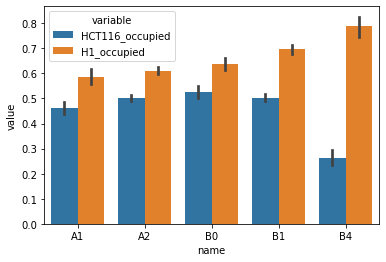

In [128]:
ax = sns.barplot(x="name", y='value', data=df_nan, hue='variable', order=['A1','A2','B0','B1','B4'])
#ax = sns.stripplot(size=1, x="name", y='value', data=df_melt, hue='variable', dodge=True, order=['A1','A0','B0','B1','B2'])
plt.savefig('Density_CTCF_h1_hct.pdf')

<h2> Insulation

In [130]:
conditions = ['H1', 'HCT']
boun_paths = {
    'H1': 'H1-hESC.boundaries.4DNFIGDQ72ID.bed.gz', 
    'HCT': 'HCT116.boundaries.4DNFIBKY9EG9.bed.gz', 
}

In [131]:
boun = {
    cond: pd.read_table(
        path, 
        sep='\t', 
        header=None,
        names=['chrom', 'start','end','strength','ins_score']
    ) for cond, path in boun_paths.items()
}

boun['H1'].head()

,chrom,start,end,strength,ins_score
0,chr1,910000,915000,Strong,1.025563
1,chr1,1065000,1070000,Weak,0.204139
2,chr1,1315000,1320000,Strong,0.586819
3,chr1,1630000,1635000,Strong,0.891663
4,chr1,1770000,1775000,Weak,0.434202


In [132]:
boun['HCT'].head()

,chrom,start,end,strength,ins_score
0,chr1,1095000,1100000,Strong,0.612423
1,chr1,1275000,1280000,Weak,0.384464
2,chr1,1620000,1625000,Weak,0.375042
3,chr1,1755000,1760000,Strong,0.519699
4,chr1,1910000,1915000,Strong,1.314856


<h4> Calculate density of insulating loci (per Mb) for each domain

In [140]:
ov = bf.count_overlaps(hct116_cluster, boun['H1'], suffixes=('','_')).rename(columns={
    'count': 'count_H1'
})
ov = bf.count_overlaps(ov, boun['HCT'], suffixes=('','_')).rename(columns={
    'count': 'count_HCT'
})

In [142]:
ov['density_H1'] = ov['count_H1'] / (ov['length']) * 1_000_000
ov['density_HCT'] = ov['count_HCT'] / (ov['length']) * 1_000_000
ov

,chrom,start,end,name,color,length,count_H1,count_HCT,density_H1,density_HCT
0,chr1,850000,1700000,A1,#e23838,850000,4,3,4.705882,3.529412
1,chr1,1750000,2450000,A2,#f78200,700000,5,4,7.142857,5.714286
2,chr1,2800000,3800000,A2,#f78200,1000000,2,2,2.000000,2.000000
3,chr1,3800000,4350000,B1,#009cdf,550000,2,2,3.636364,3.636364
4,chr1,4350000,5350000,B4,#973999,1000000,5,0,5.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
4179,chr22,47450000,49050000,B1,#009cdf,1600000,6,2,3.750000,1.250000
4180,chr22,49050000,49150000,A2,#f78200,100000,0,0,0.000000,0.000000
4181,chr22,49150000,49250000,B1,#009cdf,100000,0,0,0.000000,0.000000
4182,chr22,49250000,49800000,A2,#f78200,550000,2,2,3.636364,3.636364


In [145]:
ov.to_excel('sourcedata_ED_fig7.xlsx', sheet_name='7e', index=False)

In [147]:
ov_melt = pd.melt(
    ov, 
    id_vars=['chrom','start','end','name'], 
    value_vars=['density_HCT','density_H1']
)
ov_melt

,chrom,start,end,name,variable,value
0,chr1,850000,1700000,A1,density_HCT,3.529412
1,chr1,1750000,2450000,A2,density_HCT,5.714286
2,chr1,2800000,3800000,A2,density_HCT,2.000000
3,chr1,3800000,4350000,B1,density_HCT,3.636364
4,chr1,4350000,5350000,B4,density_HCT,0.000000
...,...,...,...,...,...,...
8363,chr22,47450000,49050000,B1,density_H1,3.750000
8364,chr22,49050000,49150000,A2,density_H1,0.000000
8365,chr22,49150000,49250000,B1,density_H1,0.000000
8366,chr22,49250000,49800000,A2,density_H1,3.636364


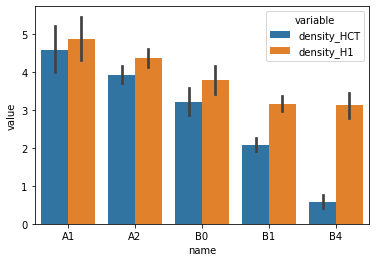

In [148]:
ax = sns.barplot(x="name", y='value', data=ov_melt, hue='variable', order=['A1','A2','B0','B1','B4'])

plt.savefig('Density_ins_h1_hct.pdf')

In [149]:
ov_melt.groupby('name').size() / 2

name
A1     310.0
A2    1448.0
B0     711.0
B1    1333.0
B4     382.0
dtype: float64

In [150]:
ov_melt.groupby('name').size().sum() / 2

4184.0